In [ ]:
# connecting to Kaggle's API using Google Colab
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# downloading dataset as Zip in colab
!kaggle datasets download -d laotse/credit-risk-dataset

Saving kaggle.json to kaggle.json
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 111MB/s]


In [ ]:
# unzipping file
!unzip -q "/content/credit-risk-dataset.zip"

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# reading CSV file into pandas dataframe
df = pd.read_csv("/content/credit_risk_dataset.csv")

In [ ]:
# checking for null values (first attempt)
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# creating a copy in case needed
df1 = df.copy()
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# checking for null values (second attempt) and general info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# another generic description of the dataset
for i in df.columns:
  print(f"Field Name: {i}, Type: {df[i].dtype}, Range: {df[i].min()}-{df[i].max()}")

Field Name: person_age, Type: int64, Range: 20-144
Field Name: person_income, Type: int64, Range: 4000-6000000
Field Name: person_home_ownership, Type: object, Range: MORTGAGE-RENT
Field Name: person_emp_length, Type: float64, Range: 0.0-123.0
Field Name: loan_intent, Type: object, Range: DEBTCONSOLIDATION-VENTURE
Field Name: loan_grade, Type: object, Range: A-G
Field Name: loan_amnt, Type: int64, Range: 500-35000
Field Name: loan_int_rate, Type: float64, Range: 5.42-23.22
Field Name: loan_status, Type: int64, Range: 0-1
Field Name: loan_percent_income, Type: float64, Range: 0.0-0.83
Field Name: cb_person_default_on_file, Type: object, Range: N-Y
Field Name: cb_person_cred_hist_length, Type: int64, Range: 2-30


person_age: Age

person_income: Annual Income

person_home_ownership: Home ownership

person_emp_length: Employment length (in years)

loan_intent: Loan intent

loan_grade: Loan grade

loan_amnt: Loan amount

loan_int_rate: Interest rate

loan_status: Loan status (0 is non default 1 is default)

loan_percent_income: Percent income

cb_person_default_on_file: Historical default

cb_preson_cred_hist_length: Credit history length

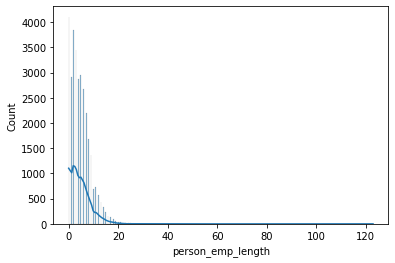

In [ ]:
# check distribution of columns with null values
sns.histplot(df, x=df["person_emp_length"], kde=True)

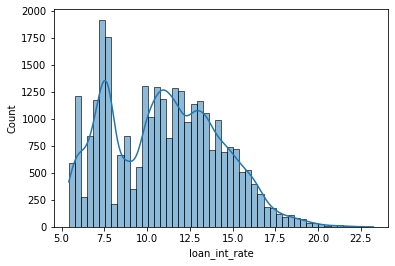

In [ ]:
# check distribution of columns with null values
sns.histplot(df, x=df["loan_int_rate"], kde=True)

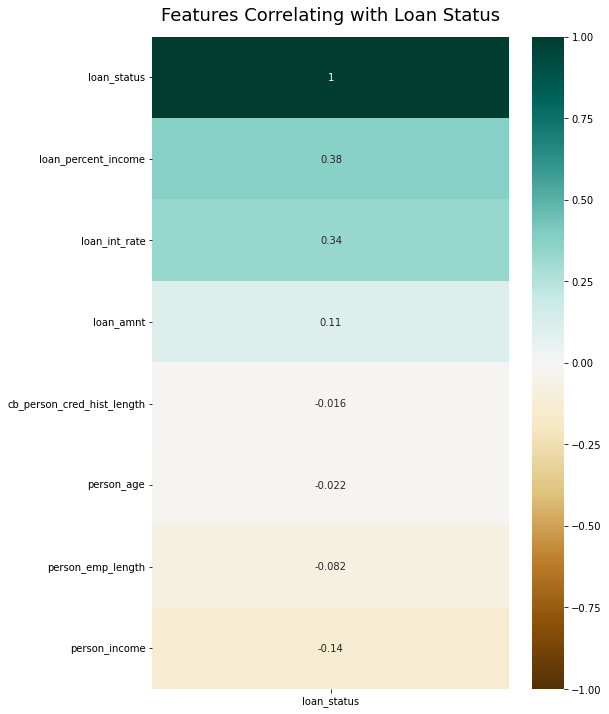

In [ ]:
# plotting correlation matrix with target variable
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Loan Status', fontdict={'fontsize':18}, pad=16);

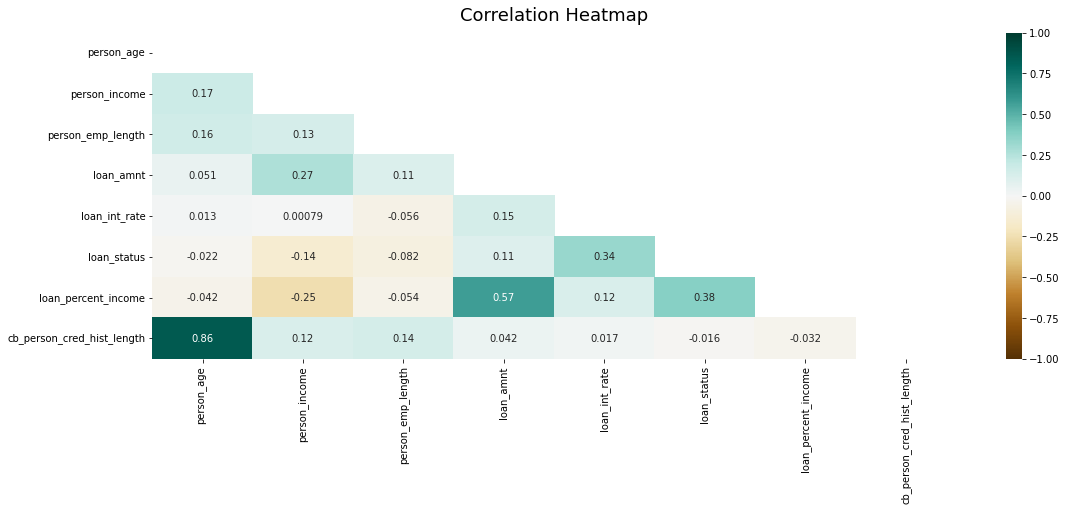

In [ ]:
# Correlation Matrix of all variables
plt.figure(figsize=(18, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = np.triu(np.ones_like(df.corr(), dtype=bool)))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

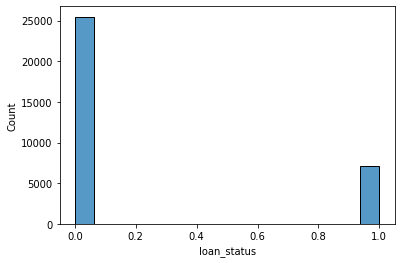

In [ ]:
# checking distribution of classes and assess imbalance
sns.histplot(df['loan_status'])

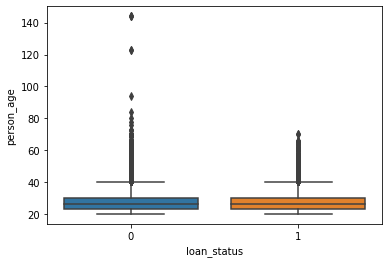

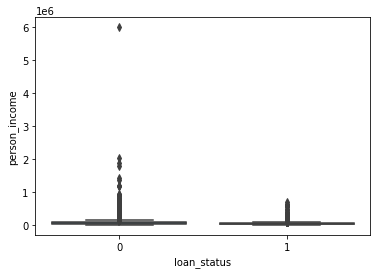

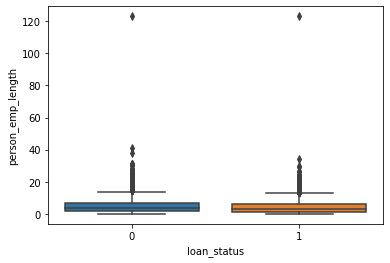

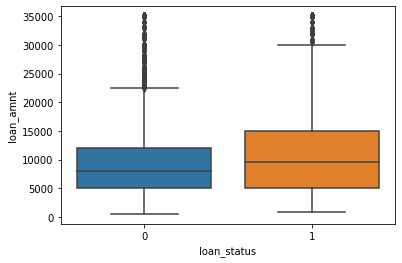

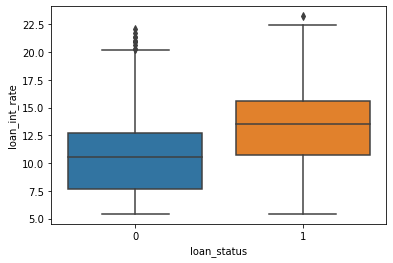

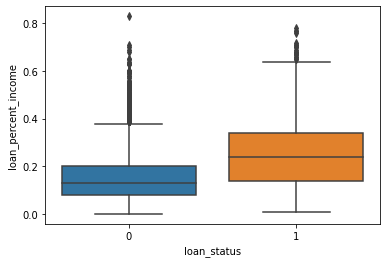

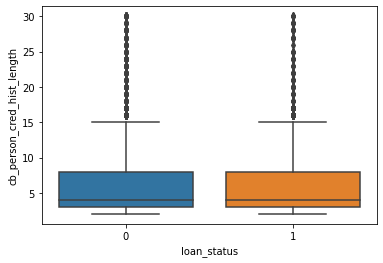

In [ ]:
# plotting boxplots for quantitative variables 
quant_col = ["person_age","person_income","person_emp_length","loan_amnt",
             "loan_int_rate","loan_percent_income", "cb_person_cred_hist_length"]

for col in quant_col:
  sns.boxplot(data=df, x="loan_status", y=col)
  plt.show()

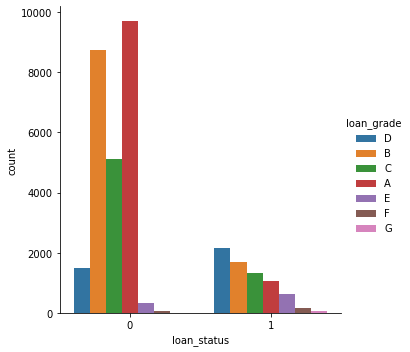

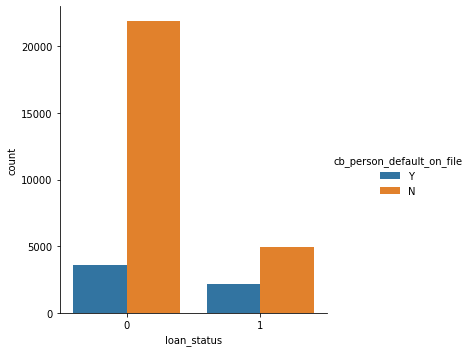

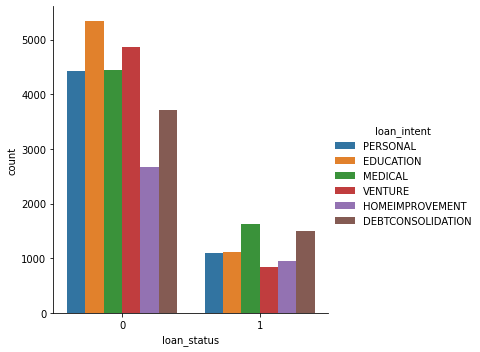

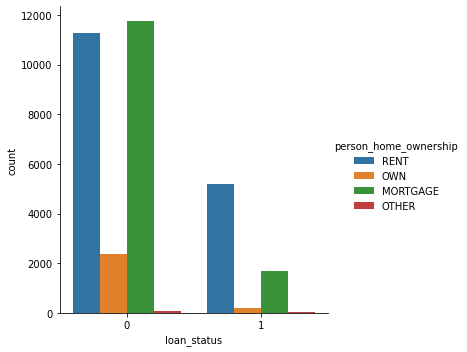

In [ ]:
# plotting catplot for all categorical variables
cat_col = ["loan_grade", "cb_person_default_on_file", "loan_intent", "person_home_ownership"]

for i in cat_col:
  sns.catplot(data=df, x='loan_status', hue=i, kind="count")
  plt.show

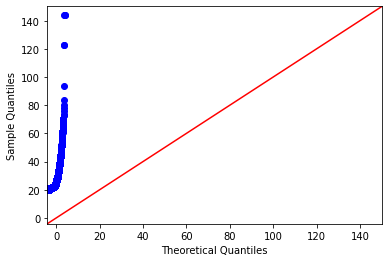

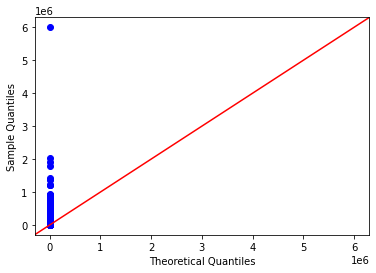

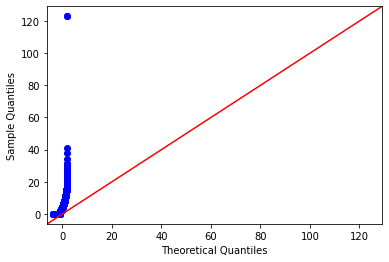

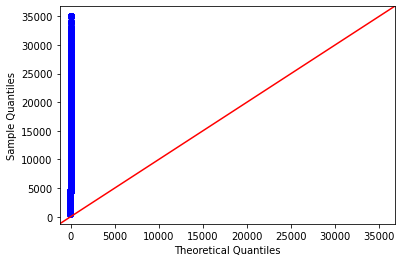

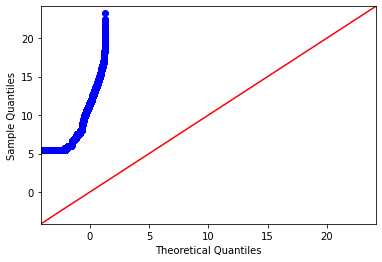

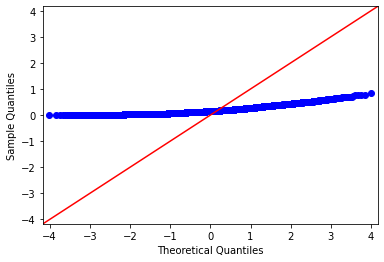

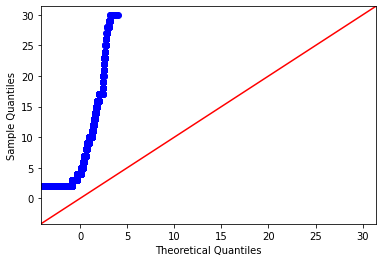

In [ ]:
# checking if quantitative variables are normally distributed
import statsmodels.api as sm

for i in quant_col:
  sm.qqplot(df[i], line='45')
  plt.show()

In [ ]:
# to be used for larger dataset to cap outliers

## Interquartile Method
# for x in ['windspeed']:
#     q75,q25 = np.percentile(BIKE.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     df.loc[df[x] < min,x] = np.nan
#     df.loc[df[x] > max,x] = np.nan

## Mean + 3 Sigma Method
# import statistics

# def cap_outliers(numbers):
#     counter = False
#     mean = statistics.mean(numbers)
#     std_dev = statistics.stdev(numbers)
#     for i in range(len(numbers)):
#         if abs(numbers[i] > (mean + 3 * std_dev)):
#             numbers[i] = mean + 3 * std_dev
#             counter = True
#     return numbers, counter

# quant_col = ["person_age","person_income","person_emp_length","loan_amnt", "loan_int_rate","loan_percent_income", "cb_person_cred_hist_length"]

# for col in quant_col:
#   counter = True

#   while counter:
#     df[col], counter = cap_outliers(df[col])

In [ ]:
# treating outliers manually since the features are just a few by replacing them with NaN and then impute
# for high dimensional dataset, cap outliers using mean + 3sigma or the Interquartile function defined above are highly encouraged (will try this in the second practice for regression)
df['person_age'] = df['person_age'].apply(lambda x: np.nan if x > 100 else x)
df['person_income'] = df['person_income'].apply(lambda x: np.nan if x > 3000000 else x)
df['person_emp_length'] = df['person_emp_length'].apply(lambda x: np.nan if x > 50 else x)

In [ ]:
# checking for new NaN values in the dataset
df.isna().sum()

person_age                       5
person_income                    1
person_home_ownership            0
person_emp_length              897
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# imputation of nan values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')

df["person_age"] = imp.fit_transform(df["person_age"].values.reshape(-1,1))
df["person_income"] = imp.fit_transform(df["person_income"].values.reshape(-1,1))
df["person_emp_length"] = imp.fit_transform(df["person_emp_length"].values.reshape(-1,1))
df["loan_int_rate"] = imp.fit_transform(df["loan_int_rate"].values.reshape(-1,1))

In [ ]:
# checking for new NaN values in the dataset after imputation
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Preprocessing**

In [ ]:
cat_col = ["loan_grade", "cb_person_default_on_file", "loan_intent", "person_home_ownership"]
quant_col = ["person_age","person_income","person_emp_length","loan_amnt",
             "loan_int_rate","loan_percent_income", "cb_person_cred_hist_length"]

In [ ]:
# can use OneHotEncoder or getDummies
# define a function for large dataset
Grade_Encoded = pd.get_dummies(df['loan_grade'], prefix='col')
Default_History_Encoded = pd.get_dummies(df['cb_person_default_on_file'], prefix='col')
Intent_Encoded = pd.get_dummies(df['loan_intent'], prefix='col')
Home_Own_Encoded = pd.get_dummies(df['person_home_ownership'], prefix='col')

In [ ]:
# concatenate encoded variables
df = pd.concat([df, Grade_Encoded, Default_History_Encoded, Intent_Encoded, Home_Own_Encoded], axis=1)

In [ ]:
# drop originally categorical variables
df = df.drop(["loan_grade", "cb_person_default_on_file", "loan_intent", "person_home_ownership"], axis=1)

In [ ]:
# scaling quantitative variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in quant_col:
  df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,col_A,col_B,...,col_DEBTCONSOLIDATION,col_EDUCATION,col_HOMEIMPROVEMENT,col_MEDICAL,col_PERSONAL,col_VENTURE,col_MORTGAGE,col_OTHER,col_OWN,col_RENT
0,-0.921560,-0.131170,-0.191082,4.019404,1.625921,1,3.931411,-0.691554,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.082735,-1.071309,0.060114,-1.358650,0.042310,0,-0.657458,-0.938167,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-0.438037,-1.071309,-0.944671,-0.646849,0.603713,1,3.744110,-0.691554,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.760386,-0.007467,-0.191082,4.019404,1.369558,1,3.369508,-0.938167,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.599211,-0.218713,0.813703,4.019404,1.058028,1,3.556809,-0.444942,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.719548,-0.245357,-0.944671,-0.599395,0.697821,0,-0.563808,5.966992,0,0,...,0,0,0,0,1,0,1,0,0,0
32577,4.236024,1.029730,-0.191082,1.271060,-1.142154,0,-0.189207,3.254251,1,0,...,0,0,0,0,1,0,1,0,0,0
32578,6.008944,0.192360,-0.442278,4.019404,-0.006367,1,2.713956,5.473767,0,1,...,0,0,1,0,0,0,0,0,0,1
32579,4.558373,1.600664,0.060114,0.855843,0.152643,0,-0.657458,4.980541,0,1,...,0,0,0,0,1,0,1,0,0,0


**Train - Test Split**

In [ ]:
# assigning variables to X & Y
y=df['loan_status']
X=df.loc[:, df.columns !="loan_status"]

In [ ]:
# train test split on dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Shape of X_train dataset: {X_train.shape}")
print(f"Shape of y_train dataset: {y_train.shape}")
print(f"Shape of X_test dataset: {X_test.shape}")
print(f"Shape of y_test dataset: {y_test.shape}")

Shape of X_train dataset: (26064, 26)
Shape of y_train dataset: (26064,)
Shape of X_test dataset: (6517, 26)
Shape of y_test dataset: (6517,)


**Oversampling to take care of Class Imbalance**

In [ ]:
# oversampling using SMOTE to treat imbalance
# Alternatives include: SMOTETomek, NearMiss, & Class Weights
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 21)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(f"Shape of X_resampled dataset: {X_resampled.shape}")
print(f"Shape of y_resampled dataset: {y_resampled.shape}")

Shape of X_resampled dataset: (40802, 26)
Shape of y_resampled dataset: (40802,)


**Model Estimation and Evaluation**

*Logistic Regression*

*Random Forest*

**Logistic Regression with Oversampled Data**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# from sklearn.model_selection import KFold

# model1 = LogisticRegression(penalty='elasticnet',solver='saga',max_iter=4000, random_state=42)

# params_lr = {"C": [0.01, 0.1, 1, 10, 100],
#              "l1_ratio": [0.15,0.35,0.55,0.75,0.95]}

# Optimize the parameters for Logistic Regression using GridSearch with CV
# clf = GridSearchCV(model1,
#                    param_grid=params_lr,
#                    scoring='accuracy',
#                    cv=5,
#                    verbose=3)

# clf.fit(X_resampled,y_resampled)

# print("Tuned Hyperparameters :", clf.best_params_)
# print("Accuracy :",clf.best_score_)

In [ ]:
# using the best model parameters from GridSearch Opt. to evaluate model
best_model1 = LogisticRegression(C=10, 
                                 penalty ='elasticnet',
                                 l1_ratio=0.35,
                                 solver='saga',
                                 max_iter=4000,
                                 random_state=42)

best_model1.fit(X_resampled,y_resampled)

# predicting the target with this model
y_pred = best_model1.predict(X_test)

# printing the model metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"The F1_Score for this model is: {metrics.f1_score(y_true=y_test, y_pred=y_pred, average='binary')}")

Accuracy: 0.8289090072119073
Precision: 0.5910596026490066
The F1_Score for this model is: 0.6576604237027939


**LR with Class Weights**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold

# NB: LR with class weights is ran on original dataset split (X_train & Y_train) but with a new argument class_weight=balanced

# model1 = LogisticRegression(class_weight='balanced', penalty='elasticnet',solver='saga',max_iter=4000, random_state=42)

# params_lr = {"C": [0.01, 0.1, 1, 10, 100],
#              "l1_ratio": [0.15,0.35,0.55,0.75,0.95]}

# Optimize the parameters for Logistic Regression using GridSearch with CV
# clf = GridSearchCV(model1,
#                    param_grid=params_lr,
#                    scoring='accuracy',
#                    cv=5,
#                    verbose=3)

# clf.fit(X_train,y_train)

# print("Tuned Hyperparameters :", clf.best_params_)
# print("Accuracy :",clf.best_score_)

In [ ]:
# using the best model parameters from GridSearch Opt. to evaluate model
best_model1 = LogisticRegression(C=10,
                                 penalty ='elasticnet',
                                 l1_ratio=0.15,
                                 class_weight='balanced',
                                 solver='saga',
                                 max_iter=4000,
                                 random_state=42)

best_model1.fit(X_train,y_train)

# predicting the target with this model
y_pred = best_model1.predict(X_test)

# printing the model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print(f"The F1_Score for this model is: {metrics.f1_score(y_true=y_test, y_pred=y_pred, average='binary')}")

Accuracy: 0.8129507442074574
Precision: 0.5558300395256917
The F1_Score for this model is: 0.6486019025655809


**RF with Oversampled Data**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# model2= RandomForestClassifier(random_state=42)

# params_rf = { 
#     'n_estimators': range(20, 100, 20),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : range(1,15,5),
#     'criterion' :['gini', 'entropy']
#     }

# Optimize the parameters for Random Forest using GridSearch with CV
# rfgrid = GridSearchCV(model2,
#                       param_grid=params_rf, 
#                       scoring='accuracy',
#                       cv= 5,
#                       verbose=3)

# rfgrid.fit(X_resampled, y_resampled)

# print("Tuned Hyperparameters :", rfgrid.best_params_)
# print("Accuracy :",rfgrid.best_score_)

In [ ]:
# using the best model parameters from GridSearch Opt. to evaluate model
best_model2 = RandomForestClassifier(criterion='gini',max_depth=11,max_features='log2', n_estimators=80)

best_model2.fit(X_resampled,y_resampled)

# predicting the target with this model
y_pred = best_model2.predict(X_test)

# printing the model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print(f"The F1_Score for this model is: {metrics.f1_score(y_true=y_test, y_pred=y_pred, average='binary')}")

Accuracy: 0.9102347705999693
Precision: 0.8302611367127496
The F1_Score for this model is: 0.7870404077175099


**RF with Class Weights**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# NB: RF with class weights is ran on original dataset split (X_train & Y_train) but with a new argument class_weight=balanced
# model2= RandomForestClassifier(class_weight='balanced', random_state=42)

# params_rf = { 
#     'n_estimators': range(20, 100, 20),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : range(1,15,5),
#     'criterion' :['gini', 'entropy']
#     }

# rfgrid = GridSearchCV(model2,
#                       param_grid=params_rf, 
#                       scoring='accuracy',
#                       cv= 5,
#                       verbose=3)

# rfgrid.fit(X_train, y_train)

# print("Tuned Hyperparameters :", rfgrid.best_params_)
# print("Accuracy :",rfgrid.best_score_)

In [ ]:
# using the best model parameters from GridSearch Opt. to evaluate model
best_model2 = RandomForestClassifier(class_weight='balanced',
                                     criterion='gini',
                                     max_depth=11,
                                     max_features='auto',
                                     n_estimators=60,
                                     random_state=42)

best_model2.fit(X_train,y_train)

# predicting the target with this model
y_pred = best_model2.predict(X_test)

# printing the model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print(f"The F1_Score for this model is: {metrics.f1_score(y_true=y_test, y_pred=y_pred, average='binary')}")

Accuracy: 0.917446677919288
Precision: 0.8732510288065843
The F1_Score for this model is: 0.7977443609022558


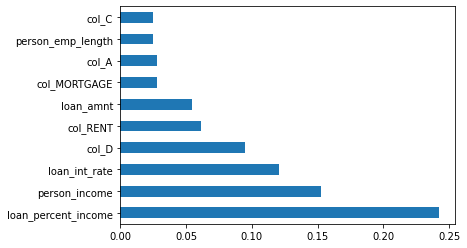

In [ ]:
(pd.Series(best_model2.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh'))  

In [ ]:
import shap

X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(best_model2)
shap_values = explainer.shap_values(X_importance)

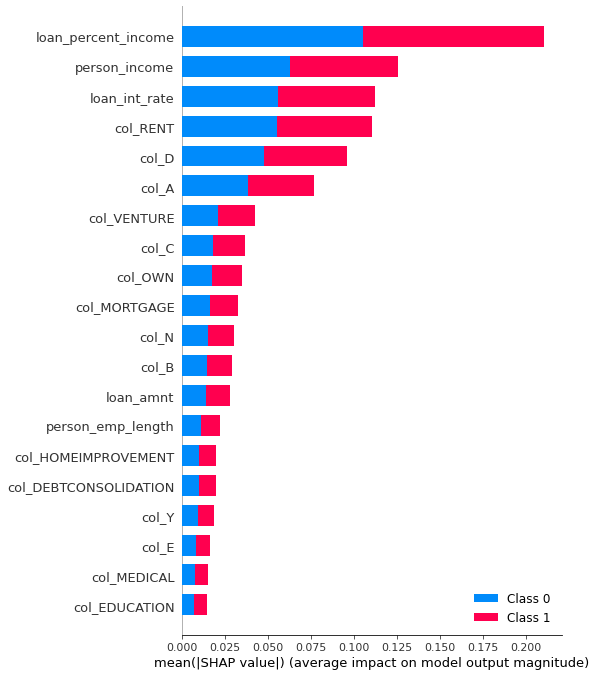

In [ ]:
shap.summary_plot(shap_values, X_importance)